# K-Means vs. DBSCAN

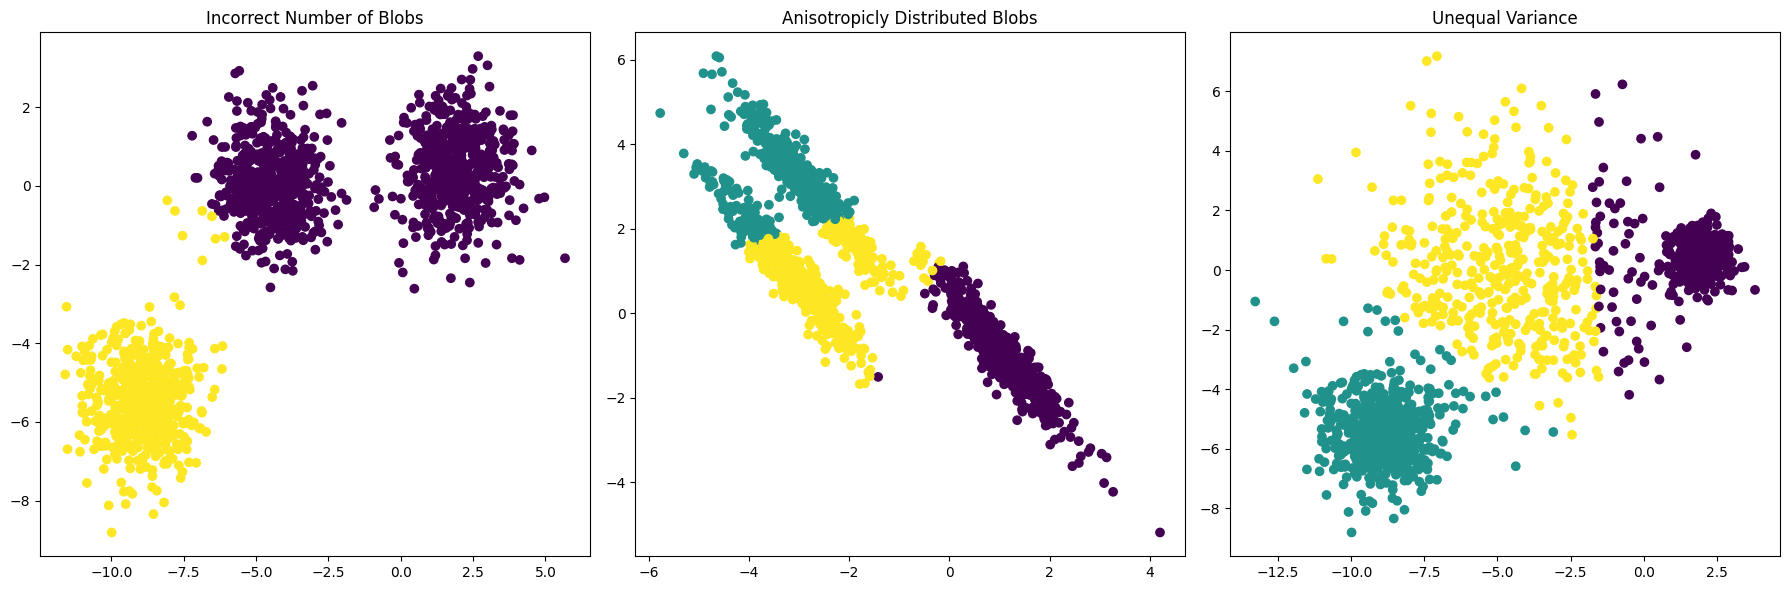

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs

plt.figure(figsize=(18, 6))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state,
                n_init='auto').fit_predict(X)

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('Incorrect Number of Blobs')

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state,
                n_init='auto').fit_predict(X_aniso)

plt.subplot(132)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title('Anisotropicly Distributed Blobs')

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state,
                n_init='auto').fit_predict(X_varied)

plt.subplot(133)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title('Unequal Variance')

plt.tight_layout()
# plt.savefig('K Means Poor Performance.png', dpi=300)
plt.show()


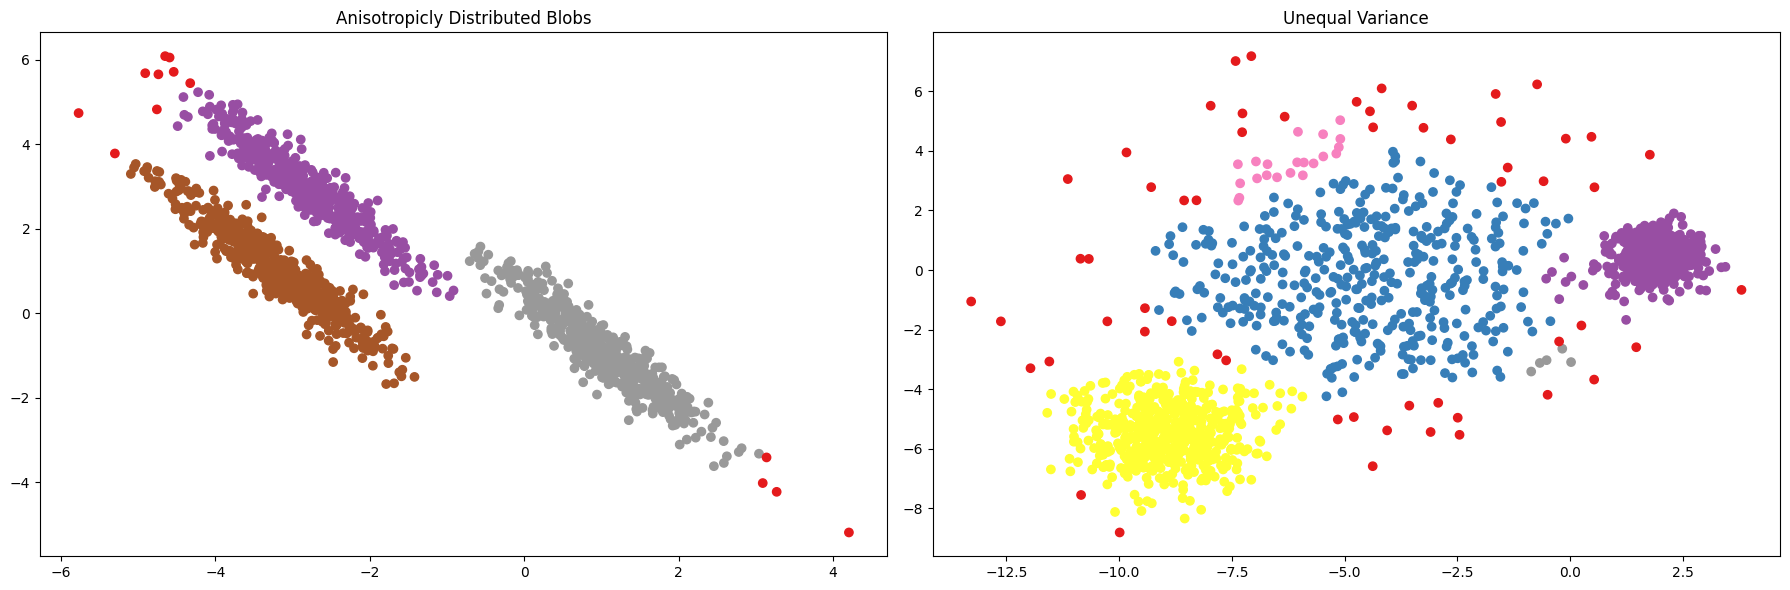

In [2]:
plt.figure(figsize=(18, 6))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = DBSCAN(eps=0.35, min_samples=5).fit_predict(X_aniso)

plt.subplot(121)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred,
            cmap=sns.color_palette('Set1', as_cmap=True))
plt.title('Anisotropicly Distributed Blobs')

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = DBSCAN(eps=0.67, min_samples=5).fit_predict(X_varied)

plt.subplot(122)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred,
            cmap=sns.color_palette('Set1', as_cmap=True))
plt.title('Unequal Variance')

plt.tight_layout()
# plt.savefig('DBSCAN Performance.png', dpi=300)
plt.show()